### 基于KNN算法的图像识别
在这个项目里， 你需要完成一个图像识别的任务，主要使用的模型是KNN算法。使用的数据集是`cifar-10`，是图像识别领域最为经典的数据及之一。具体的数据可以从以下的链接下载： https://www.cs.toronto.edu/~kriz/cifar.html， 下载之后把是数据集解压在当前的工程的根目录下。 在这个任务里，你即将要完成的几个任务是：

> 1. 读取图片文件、展示图片、并做部分采样。采样的原因主要是为了节省训练的时间，因为我们知道`KNN`的搜索复杂度为`O(N)`，何况图片也属于高维的数据，这也会增加搜索效率。
> 2. 使用`KNN`算法识别图片。在这里，我们需要使用K折交叉验证来最适合的超参数。
> 3. 使用`PCA`技术先给图片做降维，然后在使用KNN来识别图片。 另外，使用PCA把图片降维到2维度空间里，这时候相当于我们得到了每一个图片在(x,y)轴上的坐标。之后把采样过的一些图片在二维空间里根据每个坐标点来展示一下。 
> 4. 给每一个图片抽取两个经典的特征，`color historgram`和`HOG`, 抽取的过程已经给你写好。抽取完之后再通过`KNN`来训练。
> 5. 基于第四步，换成神经网络模型去识别。虽然还没有讲到神经网络，但根据提前给定的参数设置并结合`sklearn`的文档，完全可以去实现一个神经网络模型。

你需要完成的部分为标记为`TODO`的部分。 

另外，提交作业时候的注意点：
> 1. 不要试图去创建另外一个.ipynb文件，所有的程序需要在`starter_code.ipynb`里面实现。很多的模块已经帮你写好，不要试图去修改已经定义好的函数以及名字。 当然，自己可以按需求来创建新的函数。但一定要按照给定的框架来写程序，不然判作业的时候会出现很多问题。 
> 2. 上传作业的时候把整个文件解压成.zip文件（不要.rar格式），请不要上传图片文件，其他的都需要上传包括`README.md`。
> 3. 确保程序能够正常运行，我们支持的环境是`Python 3`,  千万不要使用`Python 2`
> 4. 上传前一定要确保完整性，批改过一次的作业我们不会再重新批改，会作为最终的分数来对待。 
> 5. 作业可以讨论，但请自己完成。让我们一起遵守贪心学院的`honor code`。


# 1. 文件的读取、可视化、以及采样
在这部分我们需要读取图片文件，并展示部分图片便于观察，以及做少量的采样。
> 1. 文件的读取： 读取部分的代码已经提供，你只需要调用一下即可以读取图片数据。
> 2. 可视化： 选择其中的一些样本做可视化，也就是展示图片的内容以及它的标签。 
> 3. 采样：统计一下各类出现的个数以及采样部分样本作为后续的模型的训练。

In [2]:
# 文件的读取，我们直接通过给定的`load_CIFAR10`模块读取数据。 
from load_data import load_CIFAR10   # 感谢这个magic函数，你不必要担心如何写读取的过程。如果想了解细节，可以参考此文件。
import numpy as np
import random
import matplotlib.pyplot as plt

cifar10_dir = 'cifar-10-batches-py'  # 定义文件夹的路径：请不要修改此路径！ 不然提交后的模型不能够运行。

# 清空变量，防止重复导入多次。 
try:
   del X_train, y_train
   del X_test, y_test
   print('清除之前导入过的变量...Done!')
except:
   pass

# 读取文件，并把数据保存到训练集和测试集合。  
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [3]:
# 先来查看一下每个变量的大小，确保没有任何错误！X_train和X_test的大小应该为 N*W*H*3
# N: 样本个数, W: 样本宽度 H: 样本高度， 3: RGB颜色。 y_train和y_test为图片的标签。
print ("训练数据和测试数据:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print ("标签的种类: ", np.unique(y_train)) # 查看标签的个数以及标签种类，预计10个类别。

训练数据和测试数据: (50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)
标签的种类:  [0 1 2 3 4 5 6 7 8 9]


> `TODO`: 以下的代码需要完成：从训练数据抽取10个样本（每一个类别中随机抽取10个样本），并做展示。具体的效果图如下：
<img src="images/pic1.png" alt="drawing" width="300"/>

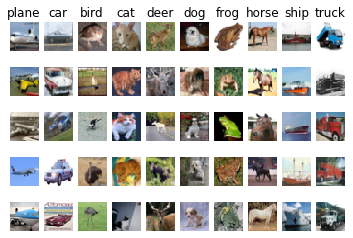

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)  # 样本种类的个数
samples_per_class = 5       # 每一个类随机选择5个样本

# TODO 图片展示部分的代码需要在这里完成。 hint:  plt.subplot函数以及 plt.imshow函数用来展示图片
#将所有标签分类，将其下标存放到一个10*n的二维数组中
tag_list = [[] for i in range(num_classes)]
for index in range(len(y_train)):
    #遍历y_train的下标，将其类别号放入对应的列表中
    Class_No = y_train[index]
    tag_list[Class_No].append(index)
    
#从所有下标中，每个类抽出5个，当作需要展示的数据的下标
data_index = []
for each_class in tag_list:
    each_class = random.sample(each_class,samples_per_class)
    data_index.append(each_class)
    
#一共十个类，创建一个10*5的二维数组存放需要展示的图片
pictures = []
for i in range(num_classes):
        pictures_per_class = X_train[np.array(data_index[i])]
        pictures.append(pictures_per_class)
pictures = np.array(pictures)

#将图片展示出来
#pictures中存储的图片为10(num)*5(samples_per_class)       
for num in range(num_classes):#第几个类
    for pos in range(samples_per_class): #每个类中第几个样本 
        if pos == 1:
            plt.title(classes[num])
        plt.subplot(samples_per_class,num_classes,pos*10 + (num+1))
        #按列优先显示，先显示每个类的样本，再显示二个类的样本，以此类推
        plt.imshow(pictures[num][pos]/255)
        plt.axis('off')       


> `TODO`: 统计一下每一个类别的图片各出现了几次？ 这有利于分析样本是否平衡还是不平衡。所谓的`不平衡样本`是有些类别的样本特别多，有些类别的样本特别少。这会引起模型训练的准确率。所以很重要一开始就要去看样本每个类别的个数。假如样本种类很多，即可以画出一个曲线出来。 

In [5]:
# TODO 统计并展示每一个类别出现的次数
class_apprence = []
for i in range(num_classes):
    class_apprence.append(len(tag_list[i]))
    print('第{}类：{}出现了{}次。'.format(i,classes[i],class_apprence[i]))



第0类：plane出现了5000次。
第1类：car出现了5000次。
第2类：bird出现了5000次。
第3类：cat出现了5000次。
第4类：deer出现了5000次。
第5类：dog出现了5000次。
第6类：frog出现了5000次。
第7类：horse出现了5000次。
第8类：ship出现了5000次。
第9类：truck出现了5000次。


> `TODO`: 随机采样样本，这是为了避免程序运行时间太长。因为KNN的复杂度是线性于样本的个数。但换成其他的算法其实就没问题，而且一般的图像识别任务都会在上百万、上千万的图片里做训练。 采样训练样本 `5000`个和测试样本`500`个。

In [6]:
# TODO 随机采样训练样本5000个和测试样本500个。训练样本从训练集里采样，测试样本从测试集里采样。
num_training = 5000
num_test = 500
np.random.seed(0)
#随机抽取下标
random_training_samples = np.random.randint(low=1,high=len(X_train),size=num_training)
random_test_samples = np.random.randint(low=1,high=len(X_test),size=num_test)
# print(random_training_samples)
# print(random_test_samples)
#根据抽取出来的下标选择样本
X_train = X_train[random_training_samples]
y_train = y_train[random_training_samples]

X_test = X_test[random_test_samples]
y_test = y_test[random_test_samples]

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5000, 32, 32, 3) (5000,) (500, 32, 32, 3) (500,)


### 2. 使用KNN算法识别图片。
这部分主要的工作是通过K折交叉验证来训练KNN，以及选择最合适的K值和p值。具体KNN的描述请看官方文档： https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

KNN有几个关键的参数：
> K: 指定选择多少个`neighbors`。 这个值越大，我们知道KNN的决策边界就会越平滑，而且越不容易过拟合， 但不保证准确率会很高。 <br/>
> p: 不同距离的指定，看以下的说明。 

KNN依赖于两个样本的距离计算，这里简单介绍一下一个概念叫做`Minkowski Distance`，是一个种通用的距离计算方法。假如我们有两个点，分别由两个向量来表达$x=(x1,x_2,...,x_d)$和$y=(y_1,y_2,...,y_d)$，这时候根据`Minkowski Distance`的定义可以得到以下的结果：

$$dist(x,y)=(\sum_{i=1}^{d}|x_i-y_i|^p)^{\frac{1}{p}}$$

从上述的距离来看其实不难发现$p=1$时其实就是绝对值的距离，$p=2$时就是欧式距离。所以欧式距离其实是`Minkowski Distance`的一个特例而已。所以这里的$p$值是可以调节的比如$p=1,2,3,4,...$。

In [7]:
# 首先我们 Reshape一下图片。图片是的每一个图片变成一个向量的形式。也就是把原来大小为(32, 32, 3)的图片直接转换成一个长度为32*32*3=3072的向量。
# 这样就直接可以作为模型的输入。 X_train_1和y_train_1是用来解决第一个问题的处理后的数据。 
X_train1 = np.reshape(X_train, (X_train.shape[0], -1))
X_test1 = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train1.shape, X_test1.shape) # 确保维度正确

(5000, 3072) (500, 3072)


> `TODO` 使用K折交叉验证去训练最好的KNN模型，并给出最好的交叉验证的结果（准确率）和在测试集上的准确率。 需要搜索的参数为`K`和`p`。对于交叉验证，在这里使用`GridSearchCV`,这是一种参数搜索的方法也叫作网格搜索，其实就是考虑所有的组合。 比如`K=[1,3,5,7]`, `p=[1,2,3]`, 则通过网格搜索会考虑所有可能的$12$种组合。

In [ ]:
# TODO 通过K折交叉验证构造最好的KNN模型，并输出最好的模型参数，以及测试集上的准确率。 
# 训练数据： （X_train1, y_train）, 测试数据：(X_test1, y_test)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# params_k = [1,3,5,7,9,11,13]  # 可以选择的K值
params_k = [1,3,5]  # 可以选择的K值
params_p = [1,2,3] # 可以选择的P值
parameters = {'n_neighbors':params_k,
              'p':params_p,
             }
# 构建模型
model = GridSearchCV(KNeighborsClassifier(), parameters, cv=5,n_jobs=2)  
model.fit(X_train1, y_train)

# 输出最好的K和p值 
print(model.best_params_)

# 输出在测试集上的准确率
print(model.score(X_test1, y_test))


> 你会发现使用KNN算法在这个数据上其实效果没有那么好，但至少要比随机预测强很多（随机预测准确率在$10%$左右，因为总共有10类）。这其实也可以理解，因为KNN算法是直接计算距离，但这种距离的计算方法不适合图片的角度改变这种变换。

### 3. 抽取图片特征，再用KNN算法来识别图片
在课程里也讲过，一种解决图像识别问题中各种环境不一致的方案是抽取对这些环境因素不敏感的特征。这就是所谓的特征工程。 在这里，我们即将会提取两种类型的特征，分别是`color histogram`和`HOG`特征，并把它们拼接在一起作为最终的特征向量。 至于这些特征的概念请参考第三章的内容，或者网络上的一些解释。我们已经提供了抽取特征的工具，只需要调用就可以使用了。 所以你需要做的任务是：
> 1. 调用特征提取工具给每一个图片提取特征。 如果想深入了解，可以查看其代码
> 2. 使用K折交叉验证去学出最好的模型（同上）

In [7]:
from features import *

num_color_bins = 10 # 设定color histogram的 bin大小

# 分别设置接下来需要调用的两个特征抽取器，分别是hog_feature, color_histogram_hsv
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]

# 抽取特征，分别对特征数据和测试数据，把结果存放在X_train2和X_test2
X_train2 = extract_features(X_train, feature_fns, verbose=True)
#X_val_feats = extract_features(X_val, feature_fns)
X_test2 = extract_features(X_test, feature_fns)

# 打印转换后的数据大小。
print (X_train2.shape, X_test2.shape)

Done extracting features for 1000 / 5000 images
Done extracting features for 2000 / 5000 images
Done extracting features for 3000 / 5000 images
Done extracting features for 4000 / 5000 images
Done extracting features for 5000 / 5000 images
(5000, 154) (500, 154)


> `TODO` 对特征数据做归一化，由于特征提取之后的，每一个维度的特征范围差异有可能比较大，所以使用KNN之前需要做归一化（具体为什么需要归一化请回顾课程内容）。在这里请使用均值为0，标准差为1的归一化，调用`StandardScaler`

In [8]:
# TODO 对于X_train2, X_test2做归一化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train2 = ss.fit_transform(X=X_train2)
X_test2 = ss.fit_transform(X=X_test2)
# print(X_train2)
# print(X_test2)

> `TODO` 使用K折交叉验证去训练最好的KNN模型，并给出最好的交叉验证的结果（准确率）和在测试集上的准确率。 需要搜索的参数为`K`和`p`。对于交叉验证，在这里使用`GridSearchCV`,这是一种参数搜索的方法也叫作网格搜索，其实就是考虑所有的组合。 比如`K=[1,3,5,7]`, `p=[1,2,3]`, 则通过网格搜索会考虑所有可能的$12$种组合。 (同上）

In [9]:
# TODO 通过K折交叉验证构造最好的KNN模型，并输出最好的模型参数，以及测试集上的准确率。 
# 训练数据： （X_train2, y_train）, 测试数据：(X_test2, y_test)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
params_k = [1,3,5]  # 可以选择的K值
# params_k = [1,3,5,7,9,11,13]  # 可以选择的K值

params_p = [1,2,3] # 可以选择的P值
parameters = {'n_neighbors':params_k,
              'p':params_p,
             }
# 构建模型

model = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)  
model.fit(X_train2, y_train)           

# 输出最好的K和p值 
print(model.best_params_)

# 输出在测试集上的准确率
print(model.score(X_test2,y_test))

{'n_neighbors': 1, 'p': 2}
0.348


> 你应该会看到效果的提升，没错！ 因为提取出来的特征会比原始的像素特征更加Robust。 除了上面所讲到的2种类型特征，也可以尝试其他图形识别的特征。这个就不作为作业里的内容。

### 4. 使用PCA对图片做降维，并做可视化
PCA是一种常用的降维工具，可以把高维度的特征映射到任意低维的空间，所以这个方法也经常用来做数据的可视化。具体PCA相关的教程可以参考sklearn官方文档，https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, 他有一个主要的参数需要设计，就是`n_components`, 指的是降维之后的维度。比如设置为2，就代表降维到2维的空间。具体PCA内部的原理我们会在无监督学习的章节里再做详细介绍。现阶段，能看懂官方文档，以及指导如何使用就可以了。 需要完成以下任务：
> 1. 通过PCA把数据降维，然后再通过KNN来分类
> 2. 把降维之后的数据可视化

> `TODO` 利用PCA把数据降维到低维的空间，请尝试不同的维度。而且在每一个维度下需要做KNN的交叉验证。最后输出交叉验证效果最好的维度，以及KNN的参数。不要改变X_train, y_train数据，因为之后还要用到原始的特征。转换后的结果请保存在X_train3, X_test3里。 

#### 使用pipe模型进行优化

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
params_components = [10, 20, 50, 100]
params_k = [1,3,5,7,9,11,13]  # 可以选择的K值
params_p = [1,2,3] # 可以选择的P值

# TODO  首先使用PCA对数据做降维，之后再用KNN做交叉验证。 每一个PCA的维度都需要做一次KNN的交叉验证过程。 
#       输入为原始的像素特征。 训练数据：X_train,  y_train  测试数据： X_test, y_test。
pipe = Pipeline([
    ('pca',PCA()),
    ('clf',KNeighborsClassifier()),
])
parameters = {
    'pca__n_components':params_components,
    'clf__n_neighbors':params_k,
    'clf__p':params_p,
}
model = GridSearchCV(pipe, parameters, cv=5,n_jobs=2,verbose=1)
model.fit(np.reshape(X_train,(X_train.shape[0],-1)),  y_train)

# 输出最好的 维度、K和p值 
print('最好的参数{}'.format(model.best_params_))

# 输出在测试集上的准确率
print(model.score(np.reshape(X_test,(X_test.shape[0],-1)),y_test))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   46.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  4.8min
[Parallel(n_jobs=2)]: Done 420 out of 420 | elapsed: 12.4min finished


最好的参数{'clf__n_neighbors': 1, 'clf__p': 2, 'pca__n_components': 20}
0.268


#### 原始代码

In [ ]:
'''from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params_components = [10, 20, 50, 100]
params_k = [1,3,5,7,9,11,13]  # 可以选择的K值
params_p = [1,2,3] # 可以选择的P值
parameters = {'n_neighbors':params_k,
              'p':params_p,
             }
# TODO  首先使用PCA对数据做降维，之后再用KNN做交叉验证。 每一个PCA的维度都需要做一次KNN的交叉验证过程。 
#       输入为原始的像素特征。 训练数据：X_train,  y_train  测试数据： X_test, y_test。
model = GridSearchCV(KNeighborsClassifier(), parameters, cv=5) 

best_score = 0
best_components = 0
best_n_neighbors = 0
best_p = 0

for i in range(len(params_components)):
    pca = PCA(params_components[i])
    temp_train = pca.fit_transform(np.reshape(X_train, (X_train.shape[0], -1)))
    model.fit(temp_train, y_train)
#     print('当前pca维度为{}，当前准确率为{}，当前参数为{}'.format(params_components[i],model.best_score_,model.best_params_))
    if model.best_score_ > best_score:
        best_score = model.best_score_
        best_components = params_components[i]
        best_n_neighbors = model.best_params_['n_neighbors']
        best_p = model.best_params_['p']
#     print('当前pca维度为{}，最好准确率为{}，最好参数为{}'.format(params_components[i],best_score,{'n_neighbors':best_n_neighbors,'p':best_p}))
pca = PCA(best_components)
X_train3 = pca.fit_transform(np.reshape(X_train, (X_train.shape[0], -1)))
X_test3 = pca.fit_transform(np.reshape(X_test, (X_test.shape[0], -1)))
        

# 输出最好的 维度、K和p值 

print('最好pca维度为{}，最好K值为{}，最好p值为{}'.format(best_components,best_n_neighbors,best_p))

# 输出在测试集上的准确率
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors,p=best_p)
knn.fit(X_train3,y_train)
print(knn.score(X_test3,y_test))'''


> `TODO` 把数据映射到2维的空间，然后展示。 从X_train中随机选择50个图片做展示, 请使用subplots. 具体来讲的话：
1. 首先把随机提取训练数据中的50个样本。
2. 对这50个样本做数据的降维，使用PCA降维到2维的空间，这时候每一个图片变成了2维的向量
3. 这2维的向量我们可以看作是图片的坐标
4. 根据图片的坐标，把每个图片展示在相应的位置，需要使用imshow来展示图片。

>并观察以下是否能看出想个相邻图片之间有一些共性？ 

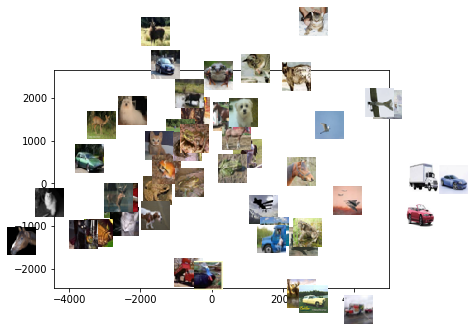

In [13]:
# TODO 请完成上述的问题
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
#提取50个样本
rand_train = np.arange(y_train.shape[0])
np.random.shuffle(rand_train)# 打乱样本索引，达到随机选择的效果
X_train4 = X_train[rand_train[:50]]
X_train5 = X_train4.reshape(X_train4.shape[0],-1)

# 对样本降维至2维
pca = PCA()
X_train5 = pca.fit_transform(X_train5)  #X_train5中存放图片的坐标

#开始画图
#设置x y轴
x, y = X_train5[:,0], X_train5[:,1]
x_min, x_max = min(x), max(x)
y_min, y_max = min(y), max(y)
x_span = x_max - x_min
y_span = y_max - y_min
#创建子图
fig = plt.figure()
plt.axis([x_min, x_max, y_min, y_max])
ax_list = []
for i in range(len(X_train5)):
    loc_x = X_train5[i,0]
    loc_y = X_train5[i,1]
    ax_list.append(fig.add_axes([(loc_x - x_min)/x_span, (loc_y - y_min)/y_span, 0.1, 0.1]))
    ax_list[-1].imshow(X_train4[i]/255)
    plt.axis('off')





(50, 32, 32, 3) (50, 2)


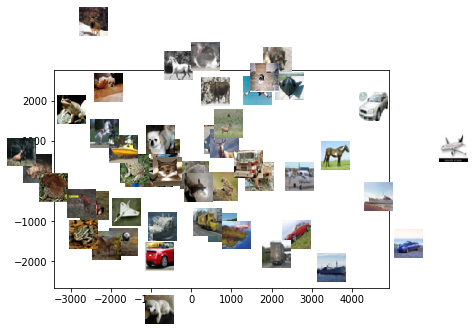

In [14]:
#参考

# TODO 请完成上述的问题
# 随机提取50个样本
rand_train4 = np.arange(y_train.shape[0])
np.random.shuffle(rand_train4) # 打乱样本索引，达到随机选择的效果
# 在训练集中随机提取50个样本，并对样本进行reshape
X_train4 = X_train[rand_train4[:50]]
X_train5 = X_train4.reshape(X_train[rand_train4[:50]].shape[0], -1)

# 对样本降维至2维
pca = PCA(n_components = 2)
pca.fit(X_train5)
X_train5 = pca.transform(X_train5)

print(X_train4.shape, X_train5.shape)

# 设置X Y轴
x, y = X_train5[: , 0], X_train5[: , 1]
x_min, x_max = min(X_train5[: , 0]), max(X_train5[: , 0])
y_min, y_max = min(X_train5[: , 1]), max(X_train5[: , 1])
x_span = x_max - x_min
y_span = y_max - y_min
# 创建子图
fig = plt.figure()
plt.axis([x_min, x_max, y_min, y_max])
ax_list = []
for i in range(len(X_train5)):
    loc_x = X_train5[i, 0] # 子图横坐标
    loc_y = X_train5[i, 1] # 子图纵坐标
    ax_list.append(fig.add_axes([(loc_x - x_min) / x_span, (loc_y - y_min) / y_span, 0.1, 0.1]))
    ax_list[-1].imshow(X_train4[i] /  255) # 展示当前坐标的图片
    plt.axis("off")

能否看到一些规律呢？ 除了PCA其实还有其他降维的工具，比如`T-SNE`，这是可视化词向量里最常用的方法。你也可以尝试用在这个问题上。但这不作为作业的一部分，具体T-sne的可视化可以参考 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 5 使用神经网络识别图片
在这里，我们将尝试使用神经网络来识别图片。虽然还没有学过神经网络但没有关系，能够看懂文档，而且知道如何调用网络模块就可以了。在深度学习部分会详细介绍这儿写模型。我们将会搭建包含一层隐含层的神经网络（多层就意味着是深度神经网络）。这里使用的数据为特征提取之后的数据（`HOG`, `color histogram`)。 

> TODO: 创建神经网络模型（叫做multilayer perceptron)， 并制定模型的参数。 具体神经网络的使用参考： https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier   在这里我们需要调整的参数为：

> 1. hidden_layer_sizes:  隐含层神经元的个数，这个值越大模型越容易过拟合，但这个值越小模型的准确率就不高 
> 2. activation: 'logistic'： 这是激活函数，可以让模型拥有非线性。有几个常见的选项个如'logistic', 'relu'等。我们在这里使用'logistic'为激活函数


In [26]:
# TODO: 利用sklearn来实现神经网络模型，并使用交叉验证来选出最好的参数hidden_layer_size
#  训练数据：(X_train2, y_train)  测试数据： (X_test2, y_test), 直接使用上面已经构建好的特征。 
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
params_hidden_layer_sizes = [10,20,30,40,50]
activation = 'logistic'

model = GridSearchCV(MLPClassifier(activation=activation),{'hidden_layer_sizes':params_hidden_layer_sizes},cv=5,n_jobs=2)
# model = GridSearchCV(MLPClassifier(),{'hidden_layer_sizes':params_hidden_layer_sizes},cv=5)

model.fit(X_train2,y_train)
# 输出最好的K和p值 
print(model.best_params_)

# 输出在测试集上的准确率

mlp = MLPClassifier(activation=activation)
mlp.fit(X_train2,y_train)
print(mlp.score(X_test2, y_test))

d:\python3.6\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'hidden_layer_sizes': 50}
0.448


d:\python3.6\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


效果是否有所提升呢？ 如果感兴趣，可以尝试调节其他的参数来进一步提升神经网络的效果。 但这不作为正式的作业。 

> 好了， 请完成所有的内容之后，把相关的文件打包成.zip上传到我们系统后台就可以了！  祝你好运~ 